<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple and Multiple Linear Regression (MLR) from Scratch

_Instructor: Aymeric Flaisler_

---

### Learning Objectives
- Code simple linear regression from scratch using a simple housing price dataset
- Understand and code the loss function MSE in regression
- Write functions to calculate the $R^2$ metric
- Understand what $R^2$ represents
- Plot the regression line and predictions against the true values
- Understand the difference between multiple linear regression and simple linear regression
- Derive the beta coefficients in MLR using linear algebra
- Construct an MLR, calculate the coefficients manually, and evaluate the $R^2$

### Lesson Guide
- [Load the real estate data](#load-data)
- [Build a simple linear regression](#build-slr)
    - [Define the target and predictor variables](#target-predictor)
    - [Code prediction function](#pred-func)
    - [Code regression plotting function](#plot-regline)
    - [Code function to calculate residuals](#calc-resids)
    - [Code function to calculate SSE](#calc-sse)
    - [Minimize the SSE](#minimize-sse)
- [R2: the coefficient of determination](#r2)
- [From SLR to MLR](#slr-to-mlr)
- [Assumptions of MLR](#assumptions)
- [Fitting a MLR](#fit-mlr)
    - [Deriving the MLR coefficients with linear algebra](#mlr-beta-derivation)
    - [Code the MLR fit](#code-mlr)
    

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load-data'></a>

## Load the real estate data

---

Over the course of this lesson we will be constructing a simple linear regression and then extend this to multiple linear regression. Included in the datasets folder is a very simple dataset on real estate prices.

**Load the data using pandas.**

In [5]:
house_csv = './datasets/housing-data.csv'
house = pd.read_csv(house_csv)
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


The columns are:

    sqft: the size of the house in sq. ft
    bdrms: number of bedrooms
    age: age in years of house
    price: the price of the house
    
**Quick check: Convert `price` to be in units of 1000 (thousands of dollars).**

In [ ]:
# house['price'] = ...


<a id='build-slr'></a>

## Build a SLR: estimating `price` with `sqft`

---

We will start by constructing the simple linear regression. Below is the formulation for the SLR and our specific model of interest:

$$ y = \beta_0 + \beta_1 x + \epsilon \\
\text{price} = \beta_0 + \beta_1 \text{sqft} + \epsilon$$

> $\beta_0$: the intercept (or bias)

Without the intercept term the regression line would always have to **pass through the origin**, which is almost never an optimal way to represent the relationship between our target and predictor variable.

> $\beta_1$: the coefficient on $x$ 

We intend to estimate the values of $y$ from $x$. Each value of $x$ is **multiplied by the same coefficient**, which is why linear regression models **model a _linear_ relationship** between our predictor and target variable.

Recall that a 1 unit increase in $x$ will correspond to a $\beta_1$ unit increase in $y$ according to our model.

> $\epsilon_1$: the error (residuals)

This is the **difference between the predicted and true values** that are unexplained by $x$ in the regression.

---

<a id='target-predictor'></a>

### Define the target and predictor variables

Extract the target variable and predictor variable from our pandas dataframe. Classically, target and predictor are referred to as dependent and independent variables. There are many different terms for what $x$ and $y$ represent.

In [6]:
# target
price = house.price.values
# predictor
sqft = house.sqft.values

<a id='pred-func'></a>

### Build a function to predict $\hat{y}$ given $x$

Build a function to represent the formula below:

$$\hat{y} = \beta_0 + \beta_1 x$$

**Note:** There is no error term in the equation. Obviously we do not know the error or we would be able to model $y$ perfectly. We can assume that our prediction $\hat{y}$ is an imperfect estimation of $y$.

In [ ]:
# def calculate_yhat(x, b0, b1): 
#     return ...?

<a id='plot-regline'></a>

### Let's write a function to plot a regression line (given)

Your function should:
- Accept $\beta_0$, $\beta_1$, $x$, and $y$ as arguments
- Calculate the predicted values $\hat{y}$ given $x$ (using the function you wrote above)
- Plot the original points
- Plot the predicted points (in a different color)
- Plot the regression line defined by the slope and intercept




In [8]:
def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    ax.set_xlabel('sq_ft')
    ax.set_ylabel('price')
    # Predictive Function
    yhat = calculate_yhat(x, b0, b1)
    # y-true
    ax.scatter(x, y, color='steelblue', s=70)
    # y-pred
    ax.scatter(x, yhat, color='darkred', s=70, alpha=0.3)
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = calculate_yhat(min_x, b0, b1)
    max_yhat = calculate_yhat(max_x, b0, b1)
    
    # plots trend line
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=2.0, alpha=0.7)
    
    plt.show()


**Use your function with $\beta_0 = 0$ and $\beta_1 = 1$.**

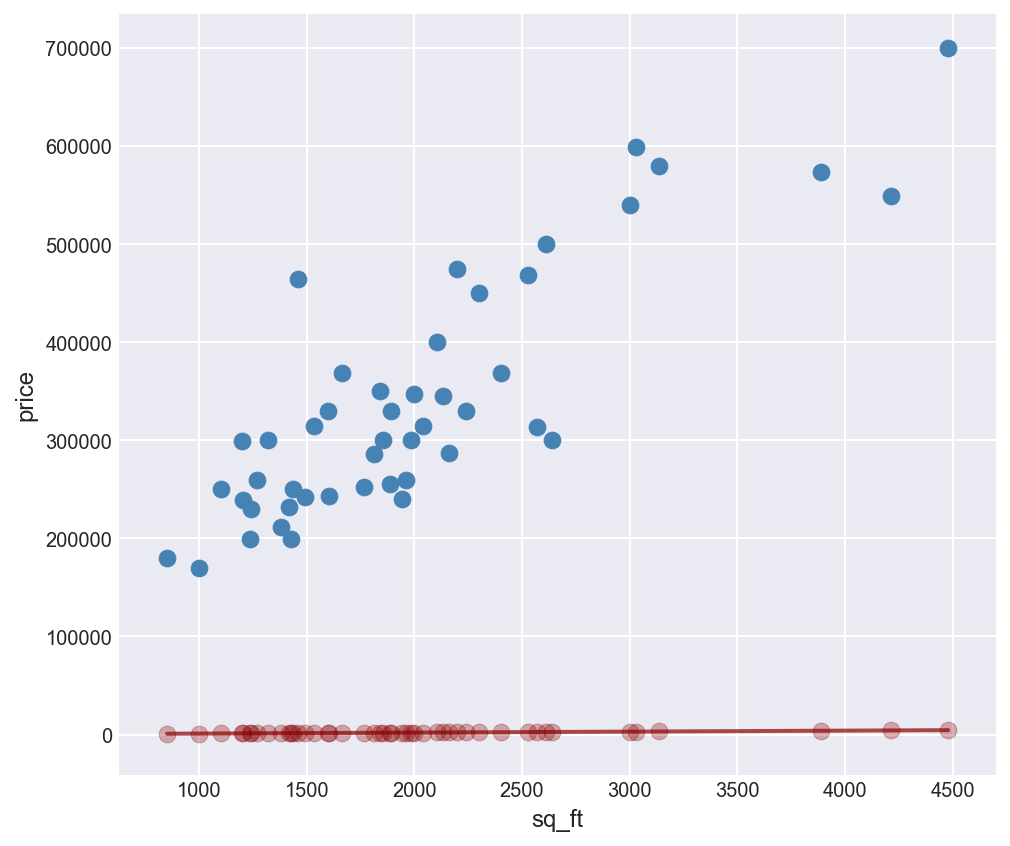

In [11]:
b0 = 0
b1 = 1
plot_regression(sqft, price, b0, b1)

<a id='calc-resids'></a>

### Write a function to calculate residuals

Recall that the residuals are simply the error of the model:

$$ \text{residual}_i = y_i - \hat{y}_i$$

where $y_i$ is the true value of our target at this observation $i$, and $\hat{y}_i$ is the predicted value of our target. Simple enough. 

In [ ]:
# def calculate_residuals(y, yhat):
#     return ...?

<a id='calc-sse'></a>

### Write a function to calculate the sum of squared errors (SSE)

Simple linear regression can use the "ordinary least squares" method for identifying linear relations between variables. Here the ["least squares"](https://www.mathworks.com/help/optim/ug/least-squares-model-fitting-algorithms.html) means that it _minimizes the sum of the squared residuals._


> **Aside:** Why the squared residuals instead of just the absolute values of the residuals? Well, both can be used – absolute value of residuals are often used when there are large outliers or other abnormalities in variables. [Solving for the least absolute deviations (LAD)](https://en.wikipedia.org/wiki/Least_absolute_deviations) is a type of "robust" regression.


In [ ]:
# def sum_sq_errors(errors):
#     return ...?

**Calculate the sum of squared errors from your initial regression with $\beta_0 = 0$ and $\beta_1 = 1$ using the functions we defined earlier.**


In [15]:
price_hat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, price_hat)
sse = sum_sq_errors(residuals)
print(sse)

6093987043363


**Choose a new $\beta_0$ and $\beta_1$ you think might be better and calculate the SSE.**

*Given our previous graph our y value (price) appears to exist between 100 thousand and 800 thousand. Lets use 100 as $\beta_0$.* 

*Square footage values appear to exist between 500 and 4500.
By dividing the price range by the sq footage range we can estimate how much price increases when square footage increases parametrized by  $\beta_1$ in this situation.*

In [ ]:
# b0 ?
# b1 ?

plot_regression(sqft, price, b0, b1)

price_hat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, price_hat)
sse = sum_sq_errors(residuals)
print(sse)

<a id='minimize-sse'></a>

### Minimizing the sum of squared errors

Deriving the equation that minimizes the sum of squared errors in simple linear regression can be done using calculus. [See here](http://web.cocc.edu/srule/MTH244/other/LRJ.PDF) or [here](https://en.wikipedia.org/wiki/Simple_linear_regression) for descriptions of the derivation.

For those familiar with calculus: **set the partial derivatives of the loss function (the mean squared error) with respect to $\beta_0$ and $\beta_1$ to 0 and solve for $\beta_0$ and $\beta_1$.** The loss function is "convex" and therefore it is at its minimum where the derivative is 0.

The equations for $\beta_0$ and $\beta_1$ that minimize the sum of squares are:

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

where $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$, respectively.

#### Write functions below to calculate $\beta_0$ and $\beta_1$ based on these equations (10min).

In [ ]:
def calc_beta_one(x, y):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    
    numerator = np.sum((y - mean_y)*(x - mean_x))
    denominator = np.sum((x - mean_x)**2)
    
    return numerator/denominator

    
def calc_beta_zero(x, y, b1):
    
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    
    return mean_y - b1*mean_x

**Calculate the optimal $\beta_1$ and $\beta_0$ using your functions.**

In [ ]:
b1 = calc_beta_one(sqft, price)
b0 = calc_beta_zero(sqft, price, b1)
print(b1, b0)

**Plot the regression with the optimal betas and calculate the SSE.**

In [ ]:
plot_regression(sqft, price, b0, b1)

price_hat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, price_hat)
sse = sum_sq_errors(residuals)
print(sse)

<a id='r2'></a>

## $R^2$: the "coefficient of determination"

---

> **$R^2$ is the amount of variance explained above baseline in your target $y$ by predictor $x$**.

It is comprised of two parts: the **total sum of squares** and the **residual sum of squares**.

The total sum of squares is defined as

$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares you are already familiar with. It is defined as

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$ is then calculated as

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

The total sum of squares is the **baseline model**: the amount of variance in $y$ we would explain if we were to predict each point of $y$ with just the mean of $y$, denoted as $\bar{y}$.

This is equivalent to estimating $y$ by fitting a regression with nothing but the intercept term $\beta_0$, which becomes the mean of $y$ (the best possible estimator of $y$ using a single value):

$$ \hat{y} = \beta_0 = \bar{y} $$

 

As the quotient of $SS_{res}$ and $SS_{tot}$ decreases, the $R^2$ value gets closer to 1. While the maximum $R^2$ is 1, an $R^2$ can be infinitely negative as well.  Having a negative $R^2$ indicates that your predictive equation has greater error than the baseline model.  

_In other words, your equation is worse at representing the relationship than a horizontal line through the y intercept._

#### Plot your regression again, with a new regression line representing the baseline model.

In [ ]:
def estimate_betas(x, y):
    b1 = calc_beta_one(x, y)
    b0 = calc_beta_zero(x, y, b1)
    return b0, b1

In [ ]:
def plot_regression_wbaseline(x, y, b0, b1):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    ax.set_xlabel('sq_ft')
    ax.set_ylabel('price')
    # predictive function
    yhat = calculate_yhat(x, b0, b1)
    ymean = np.mean(y)
    # y-true
    ax.scatter(x, y, color='steelblue', s=70, label='true y')
    # y-pred
    ax.scatter(x, yhat, color='darkred', s=70, alpha=0.3, label='y hat')
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = calculate_yhat(min_x, b0, b1)
    max_yhat = calculate_yhat(max_x, b0, b1)
    # y-pred trend line
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=2.0, alpha=0.7, label='regression model')
    # y-intercept
    ax.plot([min_x, max_x], [ymean, ymean], color='darkgoldenrod',
            linewidth=2.0, alpha=0.7, label='baseline model')
    
    plt.legend(loc='upper left')
    
    plt.show()

b0, b1 = estimate_betas(sqft, price)
plot_regression_wbaseline(sqft, price, b0, b1)

**Calculate the SSE for the baseline model and for the model with predictor `sqft`.**

In [ ]:
def calculate_sse(x, y, b0, b1):
    yhat = calculate_yhat(x, b0, b1)
    residuals = calculate_residuals(y, yhat)
    sse = sum_sq_errors(residuals)
    return sse

print('Regression SSE:', calculate_sse(sqft, price, b0, b1))
print('Baseline SSE:', calculate_sse(sqft, price, np.mean(price), 0))

#### Write a function to calculate $R^2$. print(out the $R^2$ of your model.

In [ ]:
def calculate_r2(y, yhat):
    # estimated error 

    # residual error

    # total sum of squares

    # residual sum of squares

    return 


yhat = calculate_yhat(sqft, b0, b1)
print('Regression R^2:', calculate_r2(price, yhat))
print('Baseline R^2:', calculate_r2(price, np.mean(price)))

<a id='slr-to-mlr'></a>

## From simple linear regression (SLR) to multiple linear regression (MLR)

---

The TL;DF of multiple linear regression:

> Instead of using just one predictor to estimate a continuous target, we build a model with multiple predictor variables. You will be using MLR way more than SLR going forward.

These variables will be represented as columns in a matrix (often a pandas dataframe).

**Checkout 3min: Brainstorm some examples of real-world scenarios where multiple predictors would be beneficial. Can you think of cases where it might be detrimental?**

In [ ]:
# A:

<a id='assumptions'></a>

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

The mnemonic LINEI is a useful way to remember these five assumptions.

<a id='fit-mlr'></a>

## Fitting a multiple linear regression

---

The formula for computing the $\beta$ values in multiple regression is best done using linear algebra.

$X$ is now a _matrix_ of predictors $x_1$ through $x_i$ (with each column a predictor), and $y$ is the target vector we are seeking to estimate. There is still only 1 *estimated* variable!

$$ \hat{y} = X \beta $$

**Note:** $\beta$ in the formula above is a *vector* of coefficients now, rather than a single value.

In different notation we could write $\hat{y}$ calculated with:

$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

---

<a id='mlr-beta-derivation'></a>

### Deriving the $\beta$ coefficients

$\beta$ is solved with the linear algebra formula:

$$ \beta = (X'X)^{-1}X'y $$

where $X'$ is the transposed matrix of the original matrix $X$ and $(X'X)^{-1}$ is the inverse matrix of $X'X$.



The equation using true $y$ is:

$$ y = X \beta  + \epsilon $$

Again, $\epsilon$ is our vector of errors, or residuals.

We can equivalently formulate this in terms of the residuals:

$$ \epsilon = y-X \beta $$

Our goal is to minimize the sum of squared residuals. The sum of squared residuals is equivalent to the dot product of the vector of residuals:

$$ \sum_{i=1}^n \epsilon_i^2 = 
\left[\begin{array}{cc}
\epsilon_1 \cdots \epsilon_n
\end{array}\right] 
\left[\begin{array}{cc}
\epsilon_1 \\ \cdots \\ \epsilon_n
\end{array}\right] = \epsilon' \epsilon
$$

Therefore we can write the sum of squared residuals as:

$$ \epsilon' \epsilon = (y-X \beta)' (y-X \beta) $$

Which becomes:

$$ \epsilon' \epsilon = y'y - y'X\beta - \beta' X' y + \beta' X' X \beta $$

Now take the derivative with respect to $\beta$:

$$ \frac{\partial \epsilon' \epsilon}{\partial \beta} = 
-2X'y + 2X'X\beta$$

We want to minimize the sum of squared errors, and so we set the derivative to zero and solve for the beta coefficient vector:

$$ 
\begin{eqnarray}
0 &=& -2X'y + 2X'X\beta \\
X'X\beta &=& X'y \\
\beta &=& (X'X)^{-1}X'y
\end{eqnarray}
$$

<a id='code-mlr'></a>

### Code a MLR

**First, we need to create the "design matrix" of our predictors.**

The first column will be a column of all 1s (the intercept) and the other columns will be `sqft`, `bdrms`, and `age`.

This is easiest to do with pandas: add a column for the intercept first, then extract the matrix using double squared brackets or `.values`

In [ ]:
house.head()

In [ ]:
X = house[['sqft', 'bdrms', 'age']]

# add an intercept

### Solve for the beta coefficients

We are still predicting `price`. Implement the linear algebra equation to solve for the beta coefficients. 

$$ \beta = (X'X)^{-1}X'y $$

**Tips:**

The transpose of a matrix is calculated by appending `.T` to the matrix:

    X.T

Matrices multiplied in the formula should be done with the "dot product":

    np.dot(mat1, mat2)

Inverting a matrix is done using:

    np.linalg.inv()

In [ ]:
# beta_vec = 
print(beta_vec) # you should get [ 9.24516278e+01  1.39334847e-01 -8.62147046e+00 -8.12178776e-02]

**Confirm that these betas are the same as the ones using `sklearn.linear_model.LinearRegression`**

```python
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)

print(linreg.coef_)
```

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)

print(linreg.coef_)

**Calculate predicted $\hat{y}$ with your $X$ predictor matrix and $\beta$ coefficients.**

In [ ]:
# yhat = 

**Calculate the $R^2$ of the multiple regression model.**

In [ ]:
print('Multiple regression R^2:', calculate_r2(price, yhat))

<a id='negative-r2'></a>

## A note on negative $R^2$ values

---

Over the course of this class you will encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

We will return to the topic of negative $R^2$ when we talk about training and testing sets and cross-validation.

<a id='independent-practice'></a>

## Code along practice (from yesterday last lab)

---

Using either statsmodels we are going to build a model using any set of **continuous** variables and then evaluate your model using $R^2$. 

In [44]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error

print (np.sqrt(mean_squared_error(target, predictions)))

data = datasets.load_boston()

# Create dataframe of main data to use as predictors (later). AKA "X"
df = pd.DataFrame(data.data, columns=data.feature_names)

# target vector (MEDV)
target = data.target

print (df.shape)
df.head()

5.523809263298243
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<a id='statsmodels-intro'></a>

## Fitting a linear regression using `statsmodels`

---

Now we will fit the linear regression model predicting the target from `RM` and `LSTAT`, but this time using `statsmodels`.

The format looks like:

```python
import statsmodels.api as sm

X = df[["RM","LSTAT"]].values
# manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict()
```

First we load the statsmodels api module, which contains the ordinary least squares `OLS` model class. The statsmodels process is slightly different:
- We manually make a new column for the intercept in our design matrix $X$.
- The $y$ target variable comes before the $X$ predictor
- The data is provided during the instantiation of the model object, then fit is called without the data.

**Fit the model using statsmodels.**

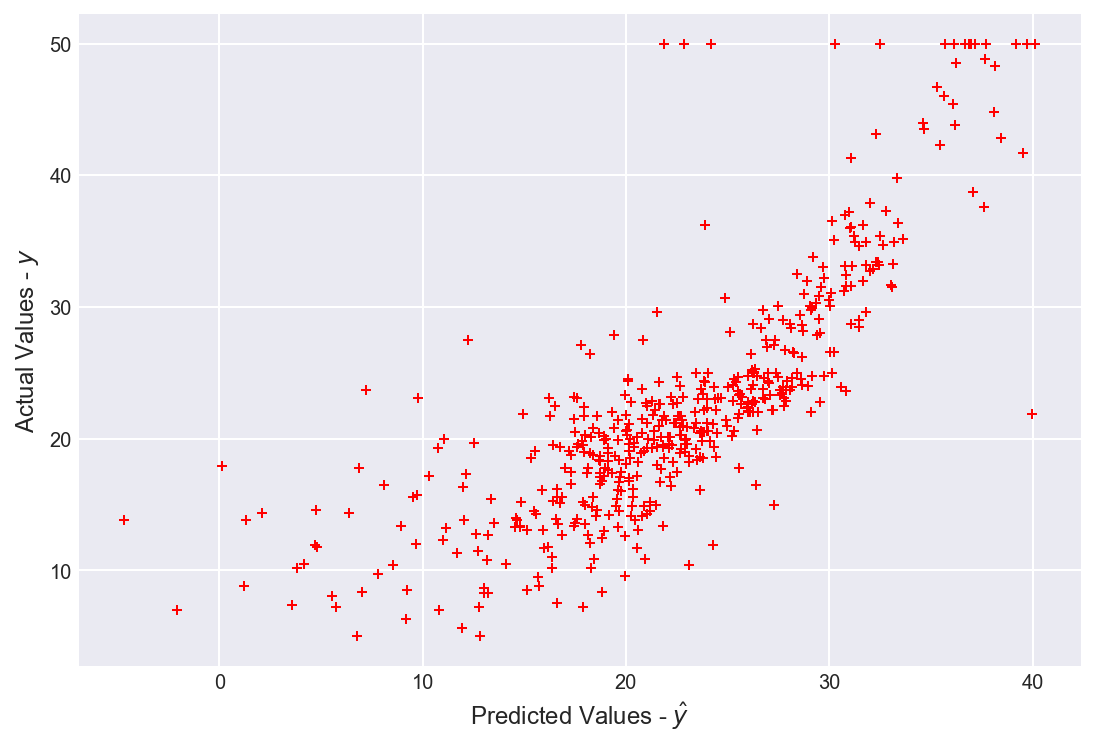

MSE: 30.51246877729947


In [45]:
import statsmodels.api as sm

X = df[["RM","LSTAT"]].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print ("MSE:", mean_squared_error(y, predictions))

<a id='statsmodels-summary'></a>

### Statsmodels `.summary()`  function

Once a model is fit with statsmodels, you can print out a variety of summary statistics, metrics, and properties of the model using the `model.summary()` function.

You are already familiar with some of the information available in the summary:
- R-squared
- Number of observations
- Coefficients for the variables and the intercept (const)
- Standard errors of the coefficients, t-statistics, p-values, and confidence intervals

There is also a variety of different metrics that we have not yet talked about. Don't hesitate to look up any of the statistics online if you are curious.

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 09 Jul 2018   Prob (F-statistic):          7.01e-112
Time:                        19:12:25   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0948      0.444     11.463      0.000       4.222       5.968
x2            -0.6424      0.044    -14.689      0.000      -0.728      -0.556
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# THREE VARIABLES

X = df[["TAX","AGE","CRIM"]].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.41
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           7.01e-33
Time:                        19:12:27   Log-Likelihood:                -1763.4
No. Observations:                 506   AIC:                             3535.
Df Residuals:                     502   BIC:                             3552.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0157      0.003     -5.629      0.000      -0.021      -0.010
x2            -0.0574      0.015     -3.939      0.000      -0.086      -0.029
x3            -0.1679      0.051     -3.324      0.001      -0.267      -0.069
const         33.5027      1.148     29.185      0.000      31.247      35.758
==============================================================================
Omnibus:                      204.159   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              699.355
Skew:                           1.906   Prob(JB):                    1.37e-152
Kurtosis:                       7.317   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# The model has an R2 of 0.262, which means that the three predictor variables I 
# have chosen explain 26.2% of the variance in the target variable not
# explained by the baseline model.

<a id='patsy'></a>

## A brief introduction to `patsy` formulas

---

Why slice and dice the data yourself when you just write a formula that defines your model?

The `patsy` package allows you to specify the construction of your model using a formula string, and then returns the matrices required to fit the model.

Let's say we wanted to predict `CRIM` from `TAX`, `AGE` and `ZN`. We would write a string formula like so:

```
formula = 'CRIM ~ TAX + AGE + ZN'
```

Then, after importing patsy, we can generate our target and predictor matrix by supplying the formula and the dataframe that contains the corresponding columns.

```python
import patsy

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
```

In [49]:
import patsy

formula = 'CRIM ~ TAX + AGE + ZN'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [50]:
y.head()

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905


In [51]:
X.head()

,Intercept,TAX,AGE,ZN
0,1.0,296.0,65.2,18.0
1,1.0,242.0,78.9,0.0
2,1.0,242.0,61.1,0.0
3,1.0,222.0,45.8,0.0
4,1.0,222.0,54.2,0.0


You'll notice that with `return_type='dataframe'` patsy's `.dmatrices()` function returns two pandas dataframes, one for the target and one for the design matrix. 

You'll also notice that it creates an intercept column by default. **If you do not want it to create an intercept column, add a -1 to the formula string**

In [29]:
from pandas_summary import DataFrameSummary as DFS

In [30]:
dfs = DFS(df)

In [52]:
dfs.summary()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.59376,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531
std,8.59678,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106
min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73
25%,0.082045,0,5.19,0,0.449,5.8855,45.025,2.10018,4,279,17.4,375.377,6.95
50%,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36
75%,3.64742,12.5,18.1,0,0.624,6.6235,94.075,5.18843,24,666,20.2,396.225,16.955
max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97
counts,506,506,506,506,506,506,506,506,506,506,506,506,506
uniques,504,26,76,2,81,446,356,412,9,66,46,357,455


In [57]:
formula = 'CRIM ~ TAX + AGE + ZN -1'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

X.sort_values('ZN', ascending=False).head()

,TAX,AGE,ZN
57,256.0,40.5,100.0
204,224.0,31.9,95.0
203,224.0,33.2,95.0
200,402.0,13.9,95.0
199,402.0,15.3,95.0


You can then feed in these matrices into statsmodels or sklearn. It is generally a good practice to convert your target matrix into a 1D vector, especially when using sklearn.

> **Tip:** The `.ravel()` function for numpy arrays will "unravel" a multidimensional matrix into a one dimensional vector of values.

In [25]:
formula = 'CRIM ~ TAX + AGE + ZN'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     86.44
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           4.22e-45
Time:                        18:54:31   Log-Likelihood:                -1700.7
No. Observations:                 506   AIC:                             3409.
Df Residuals:                     502   BIC:                             3426.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6282      1.177     -8.179      0.000     -11.941      -7.315
TAX            0.0276      0.002     12.870      0.000       0.023       0.032
AGE            0.0271      0.015      1.829      0.068      -0.002       0.056
ZN             0.0079      0.016      0.485      0.628      -0.024       0.040
==============================================================================
Omnibus:                      635.292   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63803.854
Skew:                           6.154   Prob(JB):                         0.00
Kurtosis:                      56.617   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='additional-resources'></a>

## Additional resources

---

[Maximum likelihood estimation](https://onlinecourses.science.psu.edu/stat504/node/28)